In [149]:
# Load modules:
import pandas as pd
import numpy as np
from pprint import pprint as pp
import matplotlib.pyplot as plt

In [150]:
# Load half-processed data:
listings_df = pd.read_csv("datasets/Asheville/Asheville-processed.csv", index_col = 0)
listings_df.head()

,id,experiences_offered,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,...,POPTY=Dorm,POPTY=Earth House,POPTY=House,POPTY=Loft,POPTY=Other,POPTY=Tent,POPTY=Townhouse,POPTY=Treehouse,POPTY=Villa,POPTY=Yurt
0,665257,none,2012-06-10,100%,NaN,f,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,0,0,1,0,0,0,0,0,0,0
1,2746729,none,2012-12-01,100%,84%,t,5,5,"['email', 'phone', 'reviews', 'jumio', 'kba']",t,...,0,0,0,0,0,1,0,0,0,0
2,6919450,none,2015-06-19,NaN,NaN,f,1,1,"['phone', 'facebook']",f,...,0,0,1,0,0,0,0,0,0,0
3,12286328,none,2011-06-26,100%,68%,f,6,6,"['email', 'phone', 'facebook', 'reviews']",f,...,1,0,0,0,0,0,0,0,0,0
4,156926,none,2011-06-26,100%,68%,f,6,6,"['email', 'phone', 'facebook', 'reviews']",f,...,0,0,1,0,0,0,0,0,0,0


In [151]:
# ====================    Type conversions    ====================
cols_in_currency = [
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee']

# Convert columns in currency to floats:
listings_df[cols_in_currency]=(listings_df[cols_in_currency]
                              .replace( '[\$,)]','', regex=True )
                              .replace( '[(]','-',   regex=True ).astype(float))

In [152]:
processed_df = listings_df.drop(
   ['experiences_offered',
    'square_feet',
    'neighbourhood',
    'host_verifications'], axis = 1)

# scale review_scores_rating from 0~100 to 0-10:
processed_df['review_scores_rating'] = listings_df['review_scores_rating']*.1

# drop listings without a single review:
processed_df = processed_df[processed_df.number_of_reviews != 0]

# drop listings with no review_scores_value:
processed_df.dropna(subset = ['review_scores_value', 'bathrooms', 'bedrooms', 'beds', 'review_scores_location'], inplace = True)
processed_df.shape

(736, 111)

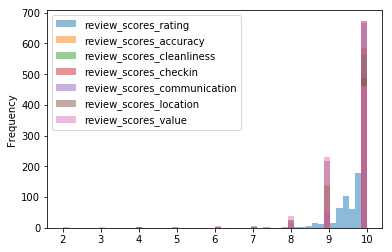

In [153]:
plt.figure()
processed_df[[
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value'
]].plot.hist(alpha =.5, bins=50)
plt.show()

In [155]:
# if no record for 'security_deposit', 'cleaning_fee' is found, assume to be asking for nothing:
processed_df['security_deposit'] = listings_df['security_deposit'].fillna(0)/listings_df.price
processed_df['cleaning_fee'    ] = listings_df['cleaning_fee'    ].fillna(0)/listings_df.price

# convert discounts:
processed_df['monthly_price'] = ((listings_df.price*30-listings_df.monthly_price).fillna(0)/(listings_df.price*30))
processed_df['weekly_price' ] = ((listings_df.price*7 -listings_df.weekly_price ).fillna(0)/(listings_df.price*7 ))

# convert prices of each listings to its ratio compared against the average price in its city:
# [TODO] processed_df.price = listings_df.price/
# rename columns:
processed_df.rename(columns={'monthly_price': 'monthly_discount_percentage', 
                             'weekly_price': 'weekly_discount_percentage',
                             'security_deposit': 'security_deposit_ratio_to_price',
                             'cleaning_fee': 'cleaning_fee_ratio_to_price'
                            }, inplace=True)


In [157]:
processed_df

,id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,city,...,POPTY=Dorm,POPTY=Earth House,POPTY=House,POPTY=Loft,POPTY=Other,POPTY=Tent,POPTY=Townhouse,POPTY=Treehouse,POPTY=Villa,POPTY=Yurt
0,665257,2012-06-10,100%,NaN,f,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
1,2746729,2012-12-01,100%,84%,t,5,5,"['email', 'phone', 'reviews', 'jumio', 'kba']",t,Asheville,...,0,0,0,0,0,1,0,0,0,0
4,156926,2011-06-26,100%,68%,f,6,6,"['email', 'phone', 'facebook', 'reviews']",f,Asheville,...,0,0,1,0,0,0,0,0,0,0
5,3767793,2013-10-12,100%,73%,f,3,3,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
6,5927700,2015-02-12,100%,100%,f,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
7,6698737,2015-03-19,100%,96%,t,1,1,"['email', 'phone', 'reviews', 'kba']",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
8,7966916,2014-04-24,100%,100%,t,1,1,"['email', 'phone', 'facebook', 'google', 'revi...",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
9,2254521,2011-04-30,100%,100%,f,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Asheville,...,0,0,0,0,0,0,0,0,0,0
10,11392366,2011-10-21,94%,78%,f,1,1,"['email', 'phone', 'facebook', 'google', 'revi...",t,Asheville,...,0,0,1,0,0,0,0,0,0,0
11,3781780,2014-08-03,70%,100%,f,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Asheville,...,0,0,1,0,0,0,0,0,0,0


In [158]:
print "List of Columns and Numbers of Nulls There:"
null_counts = processed_df.isnull().sum()
print null_counts[null_counts>0]
print "Total amount of entries:", len(processed_df)

List of Columns and Numbers of Nulls There:
host_response_rate      28
host_acceptance_rate    40
dtype: int64
Total amount of entries: 736


In [161]:
processed_df.to_csv('datasets/Asheville/Asheville-processed2.csv')